In [3]:
from statistics import mean
from pprint import pprint
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')

/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_34219/603711453.py:7: RuntimeWarning: divide by zero encountered in log
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)
/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_34219/603711453.py:7: RuntimeWarning: invalid value encountered in sqrt
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)


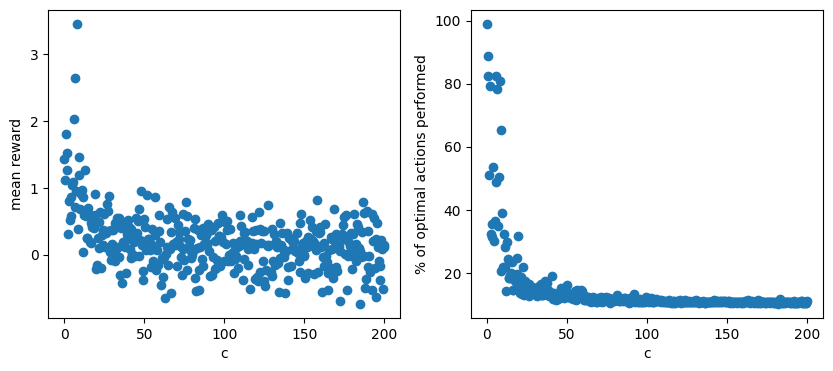

In [4]:


def play(i, Q):
    return np.random.normal(Q[i], 1, 1)[0]


def upper_confidence_estimation(reward_estimate, num_executions, t, c):
    if not num_executions: num_executions = 1
    return reward_estimate + c * np.sqrt(np.log(t) / num_executions)


# apply a single episode
def episode(c):
    k = 10 # number of arms
    Q = np.random.normal(0, 1, k)  # True value of each arm
    optimal_a = np.argmax(Q)

    # Agent data
    n = np.zeros(k)  # number of executions per action
    q = np.zeros(k)  # estimated gain per action
    R = []  # all received rewards

    T = 1000  # number of time steps
    for i in range(T):
        # pick an action using the upper-confidence-bound formula
        confidences = [upper_confidence_estimation(q[a], n[a], i, c) for a in range(k)]
        a = np.argmax(confidences)

        # perform the action and get a reward
        r = play(a, Q)
        # save the reward for statistics later
        R.append(r)
        # update the reward estimation for the chosen action
        q[a] = q[a] + (r - q[a]) / (n[a] if n[a] else 1)
        # increase its play-counter
        n[a] += 1

    # compute the average reward
    mean_reward = mean(R)
    # compute the percentage of optimal actions taken
    perc_optimal_a_picks = n[optimal_a] / T * 100
    return mean_reward, perc_optimal_a_picks


mean_rewards = []
percentages_optimal_a_picks = []
# get "all" possible values for c
step=0.5
uncertainties = np.arange(0, 200+step, step)
for c in uncertainties:
    mr, pop = episode(c)
    mean_rewards.append(mr)
    percentages_optimal_a_picks.append(pop)

# visualize the results
# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

ax1.scatter(uncertainties, mean_rewards)
ax1.set_xlabel("c")
ax1.set_ylabel("mean reward")

ax2.scatter(uncertainties, percentages_optimal_a_picks)
ax2.set_xlabel("c")
ax2.set_ylabel("% of optimal actions performed")

plt.show()